In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import data and data exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coursera_DA/2017_Yellow_Taxi_Trip_Data.csv')

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [ ]:
df.size

408582

In [ ]:
df[['tpep_pickup_datetime']]

,tpep_pickup_datetime
0,03/25/2017 8:55:43 AM
1,04/11/2017 2:53:28 PM
2,12/15/2017 7:26:56 AM
3,05/07/2017 1:17:59 PM
4,04/15/2017 11:32:20 PM
...,...
22694,02/24/2017 5:37:23 PM
22695,08/06/2017 4:43:59 PM
22696,09/04/2017 2:54:14 PM
22697,07/15/2017 12:56:30 PM


*\Convert the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns to Datetime type.\*


---

In [ ]:
df['pickup_date'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_date'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  object        
 3   tpep_dropoff_datetime  22699 non-null  object        
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

# 2. Data visualization.

*Create a box plot for Trip Distance.*

<Axes: title={'center': 'Trip Distance'}, xlabel='trip_distance'>

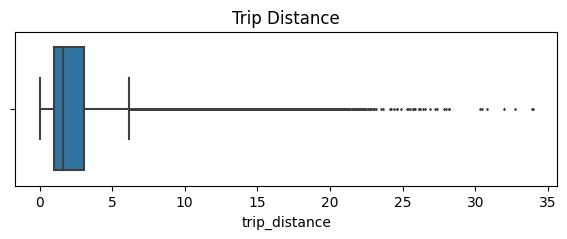

In [ ]:
plt.figure(figsize=(7,2))
plt.title('Trip Distance')
sns.boxplot(data = df, x = df['trip_distance'], fliersize = 1)

*Visualize a histogram for Trip Distance.*

<Axes: title={'center': 'Trip Distance Histogram'}, xlabel='trip_distance', ylabel='Count'>

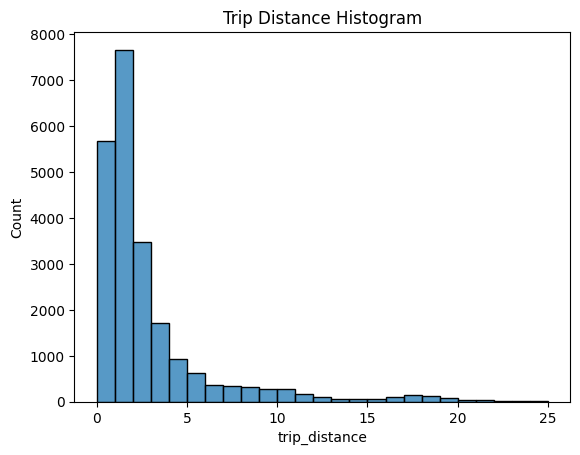

In [ ]:
plt.title('Trip Distance Histogram')
sns.histplot(data = df, x = df['trip_distance'], bins = range(0,26,1))

*Create box plot and histogram for total amount.*

<Axes: title={'center': 'Total Amount'}, xlabel='total_amount'>

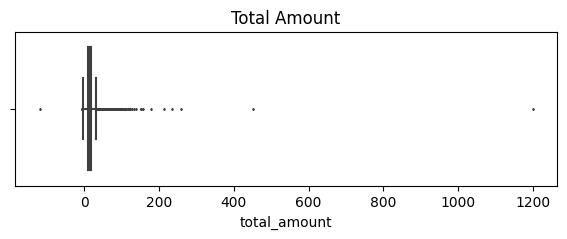

In [ ]:
plt.figure(figsize=(7,2))
plt.title('Total Amount')
sns.boxplot(data = df, x = df['total_amount'], fliersize = 1)

Text(0.5, 1.0, 'Total Amount Histogram')

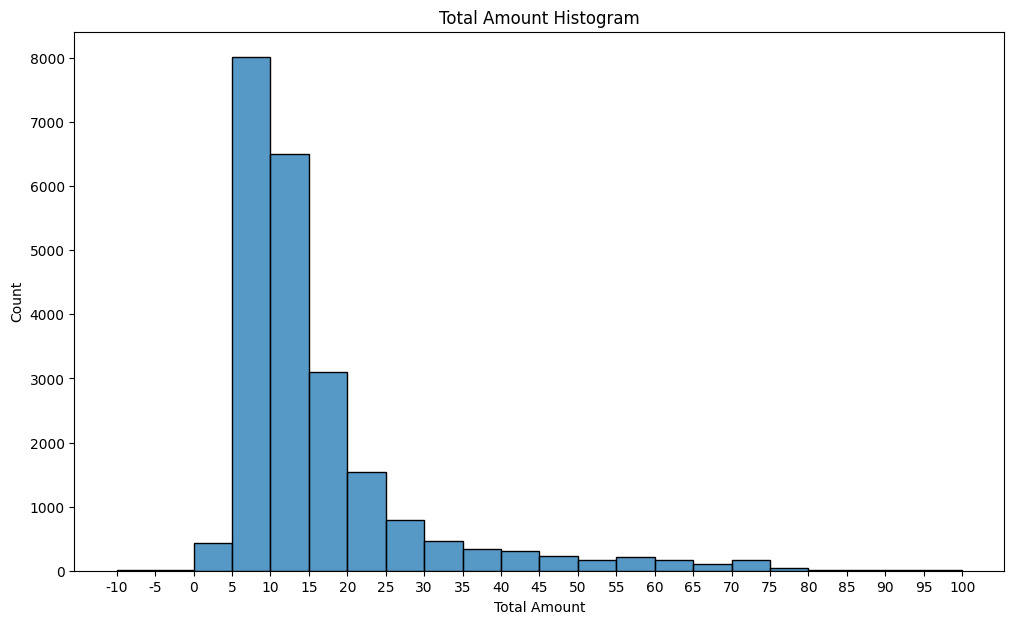

In [ ]:
plt.figure(figsize = (12,7))
p = sns.histplot(data = df, x = df['total_amount'], bins = range(-10,101,5))
p.set_xticks(range(-10,101,5))
p.set_xticklabels(range(-10,101,5))
plt.xlabel('Total Amount')
plt.title('Total Amount Histogram')

*Create box plot and histogram for tip amount.*

<Axes: title={'center': 'Tip Amount'}, xlabel='tip_amount'>

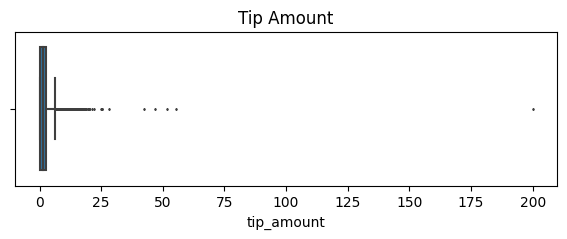

In [ ]:
plt.figure(figsize=(7,2))
plt.title('Tip Amount')
sns.boxplot(data = df, x = df['tip_amount'], fliersize = 1)

Text(0.5, 1.0, 'Tip Amount Histogram')

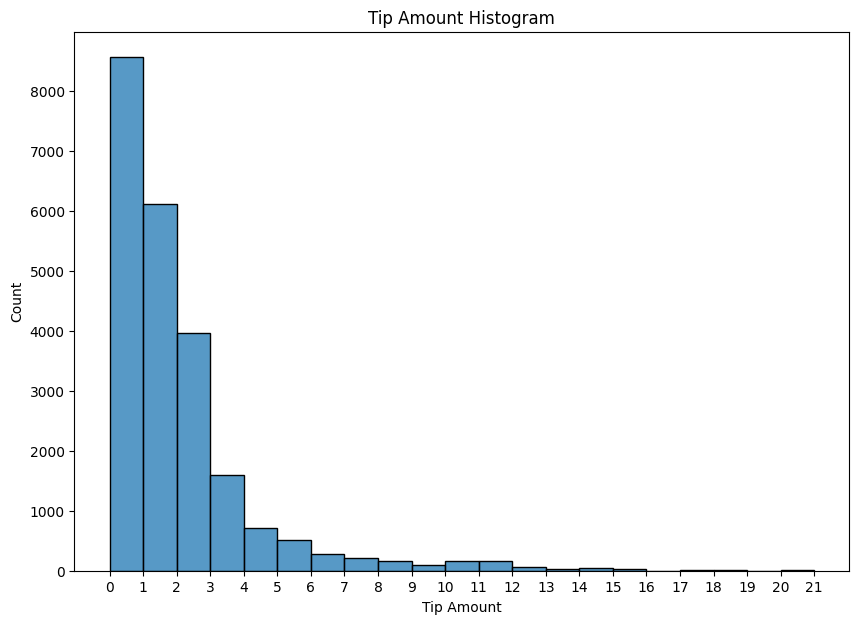

In [ ]:
plt.figure(figsize = (10,7))
p = sns.histplot(data = df, x = df['tip_amount'], bins = range(0,22,1))
p.set_xticks(range(0,22,1))
p.set_xticklabels(range(0,22,1))
plt.xlabel('Tip Amount')
plt.title('Tip Amount Histogram')

*Create tip amount histogram by vendor.*

In [ ]:
tip_by_vendor = df.groupby(['tip_amount'])['VendorID'].nunique().reset_index()

In [ ]:
tip_by_vendor['VendorID'].value_counts()

1    525
2    217
Name: VendorID, dtype: int64

Text(0.5, 1.0, 'Tip Amount Histogram by Vendor')

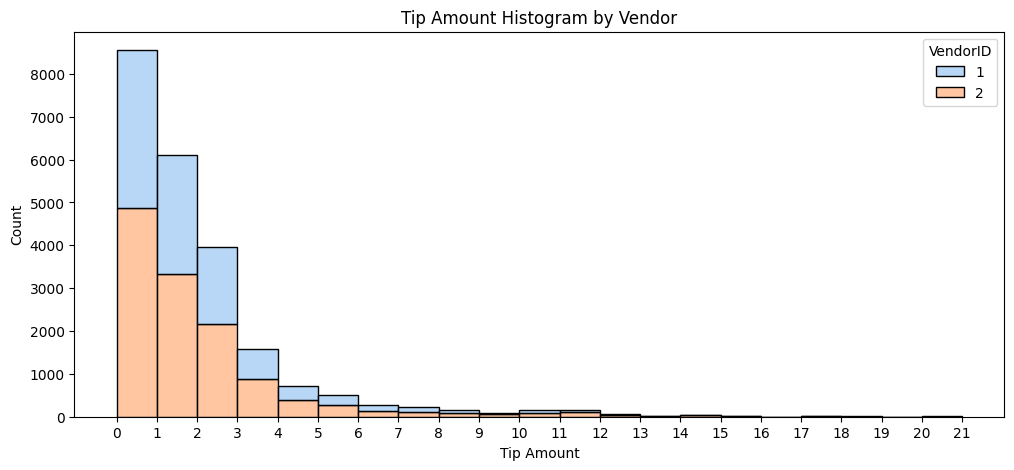

In [ ]:
plt.figure(figsize = (12,5))
px = sns.histplot(data = df, x = df['tip_amount'], bins = range(0,22,1), hue = 'VendorID', multiple="stack", palette = 'pastel')
px.set_xticks(range(0,22,1))
px.set_xticklabels(range(0,22,1))
plt.xlabel('Tip Amount')
plt.title('Tip Amount Histogram by Vendor')

*- Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.*


---



*Create a histogram plot of tip amount by vendor (for tip > $10).*

In [ ]:
tip_over_ten = df[df['tip_amount'] > 10]
tip_over_ten.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_date,dropoff_date
11,18600059,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.00,0.0,0.5,14.58,5.54,0.3,72.92,2017-03-05 19:15:30,2017-03-05 19:52:18
21,85505540,2,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81,2017-10-11 12:34:49,2017-10-11 13:22:38
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,2017-11-06 20:30:50,2017-11-07 00:00:00
156,104881101,1,12/11/2017 10:21:18 AM,12/11/2017 11:14:57 AM,1,15.60,1,N,138,88,1,51.50,0.0,0.5,11.60,5.76,0.3,69.66,2017-12-11 10:21:18,2017-12-11 11:14:57
220,95620783,2,11/11/2017 1:39:55 PM,11/11/2017 2:53:05 PM,1,13.61,1,N,132,181,1,55.00,0.0,0.5,11.16,0.00,0.3,66.96,2017-11-11 13:39:55,2017-11-11 14:53:05


Text(0.5, 1.0, 'Tip Amount Histogram by Vendor (for tip > $10)')

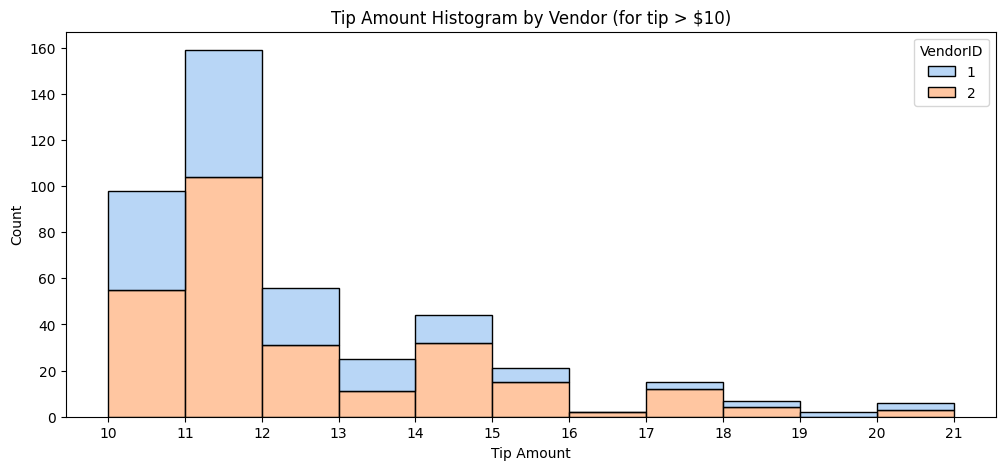

In [ ]:
plt.figure(figsize = (12,5))
px = sns.histplot(data = tip_over_ten, x = tip_over_ten['tip_amount'], bins = range(10,22,1), hue = 'VendorID', multiple="stack", palette = 'pastel')
px.set_xticks(range(10,22,1))
px.set_xticklabels(range(10,22,1))
plt.xlabel('Tip Amount')
plt.title('Tip Amount Histogram by Vendor (for tip > $10)')

*- The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.*


---



*- Examine the unique values in the 'passenger_count' column*

In [ ]:
df[['passenger_count']].head(10)

,passenger_count
0,6
1,1
2,1
3,1
4,1
5,6
6,1
7,1
8,1
9,1


In [ ]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

*- Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.*

In [ ]:
# Calculate mean of tip by passenger count
mean_tip_by_passenger = df.groupby(['passenger_count'])['tip_amount'].mean().reset_index()
mean_tip_by_passenger

,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


Text(0.5, 1.0, 'Mean tip amount by passenger count')

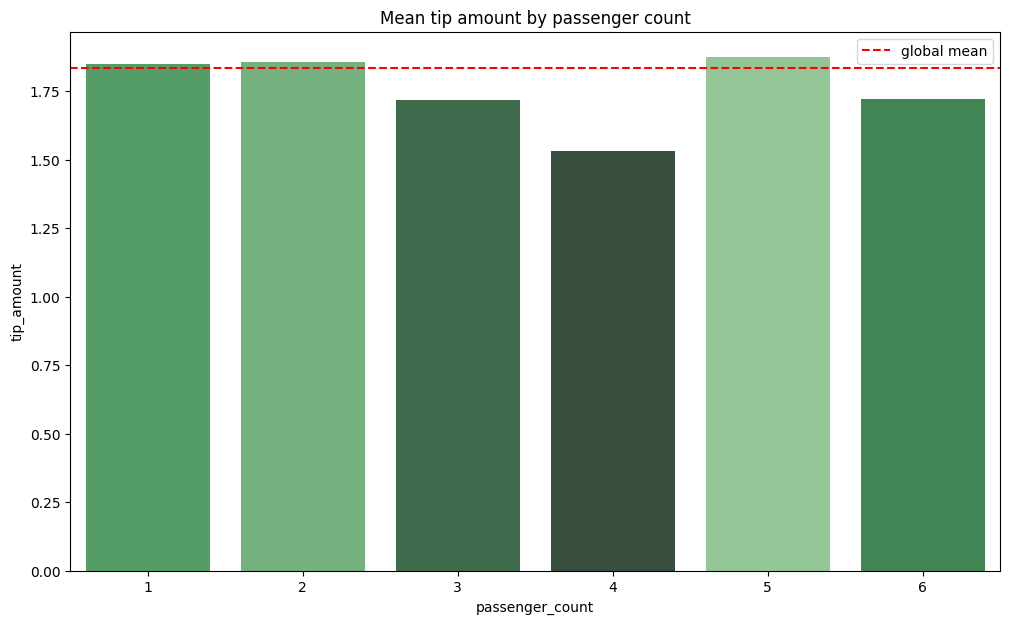

In [ ]:
# Visualize the mean of tip by passenger count
plt.figure(figsize = (12, 7))
data = mean_tip_by_passenger[mean_tip_by_passenger['passenger_count'] > 0]
pal = sns.color_palette('Greens_d', len(data))
rank = data['tip_amount'].argsort().argsort()
px2 = sns.barplot(data,
                  x = data['passenger_count'],
                  y = data['tip_amount'],
                  palette = np.array(pal[::-1])[rank])

px2.axhline(df['tip_amount'].mean(), ls = '--', color = 'red', label = 'global mean')
px2.legend()
plt.title('Mean tip amount by passenger count')

*- Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).*


---



In [ ]:
# Create month and day columns
df['month'] = df['pickup_date'].dt.month_name()
df['day'] = df['pickup_date'].dt.day_name()

In [ ]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_date,dropoff_date,month,day
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 08:55:43,2017-03-25 09:09:47,March,Saturday
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 14:53:28,2017-04-11 15:19:58,April,Tuesday
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:26:56,2017-12-15 07:34:08,December,Friday
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:17:59,2017-05-07 13:48:14,May,Sunday
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:32:20,2017-04-15 23:49:03,April,Saturday
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:34:11,2017-03-25 20:42:11,March,Saturday
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 19:04:09,2017-05-03 20:03:47,May,Wednesday
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 17:41:06,2017-08-15 18:03:05,August,Tuesday
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:17:07,2017-02-04 16:29:14,February,Saturday
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:20:29,2017-11-10 15:40:55,November,Friday


In [ ]:
# Calculate total ride count by month
total_ride_month = df['month'].value_counts()
total_ride_month

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [ ]:
# Put the month in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

total_ride_month = total_ride_month.reindex(index = month_order)
total_ride_month

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

Text(0, 0.5, 'Total ride count')

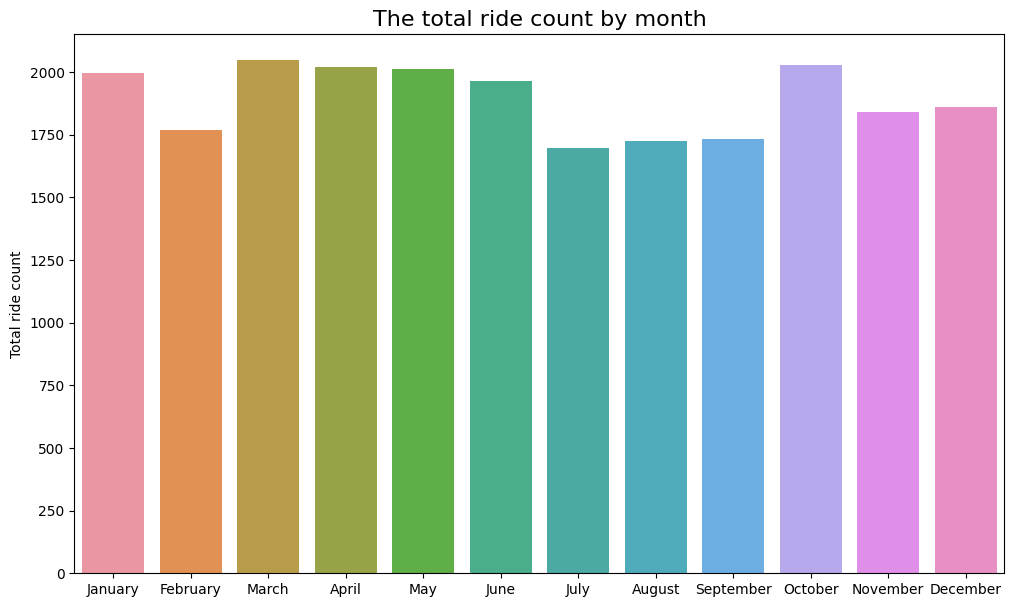

In [ ]:
# Visualize the total ride count by month

plt.figure(figsize = (12,7))
plt.title("The total ride count by month", fontsize = 16)
px3 = sns.barplot( x = total_ride_month.index, y = total_ride_month)
px3.set_xticklabels(month_order)
plt.ylabel('Total ride count')

*- Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.*

In [ ]:
# Calculate the total ride count by day
daily_ride = df['day'].value_counts()
daily_ride

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: day, dtype: int64

In [ ]:
# Sort the daily ride in weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ride = daily_ride.reindex(index = day_order)
daily_ride

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

Text(0, 0.5, 'Total ride count')

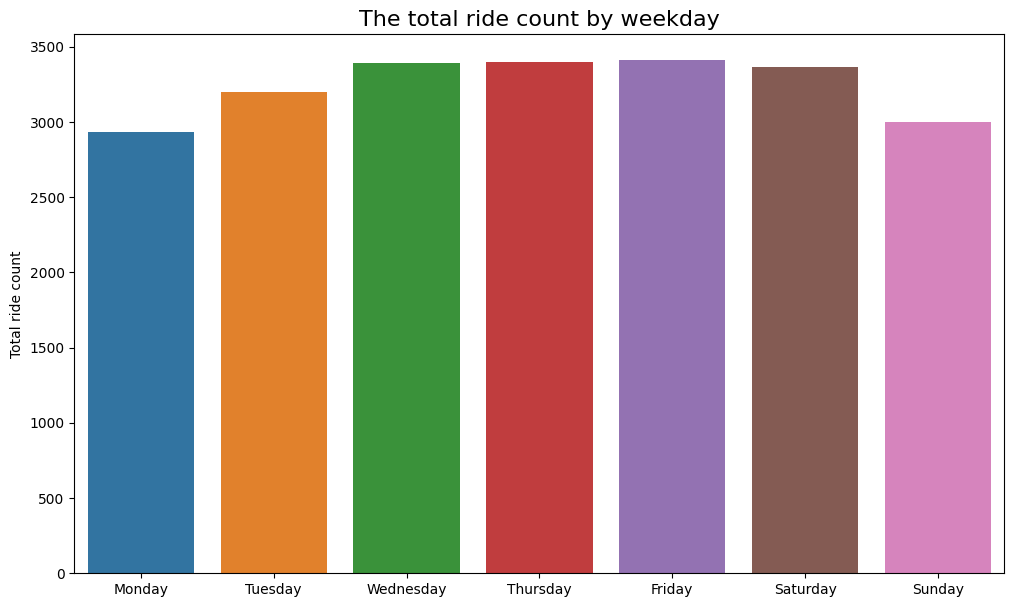

In [ ]:
# Visualize the total ride count by day

plt.figure(figsize = (12,7))
plt.title("The total ride count by weekday", fontsize = 16)
px3 = sns.barplot( x = daily_ride.index, y = daily_ride)
px3.set_xticklabels(day_order)
plt.ylabel('Total ride count')

*- Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.*

In [ ]:
# Calculate the total revenue by weekday

daily_revenue = df.groupby(['day'])['total_amount'].sum()
daily_revenue

day
Friday       55818.74
Monday       49574.37
Saturday     51195.40
Sunday       48624.06
Thursday     57181.91
Tuesday      52527.14
Wednesday    55310.47
Name: total_amount, dtype: float64

In [ ]:
# Arrange the daily revenue in weekday order

daily_revenue = daily_revenue.reindex(index = day_order)
daily_revenue

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

Text(0, 0.5, 'Total revenue count')

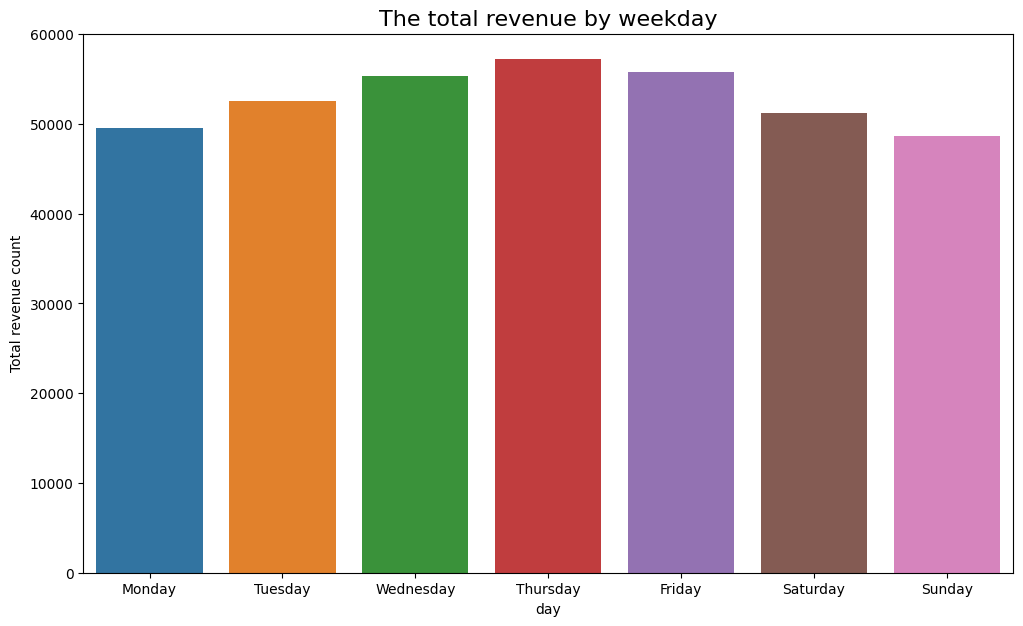

In [ ]:
# Create a bar plot of daily revenue

plt.figure(figsize = (12,7))
plt.title("The total revenue by weekday", fontsize = 16)
px3 = sns.barplot( x = daily_revenue.index, y = daily_revenue)
px3.set_xticklabels(day_order)
plt.ylabel('Total revenue count')

*- Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.*

In [ ]:
# Calculate the monthly revenue

monthly_revenue = df.groupby(['month'])['total_amount'].sum()
monthly_revenue = monthly_revenue.reindex(index = month_order)
monthly_revenue

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

Text(0, 0.5, 'Total revenue count')

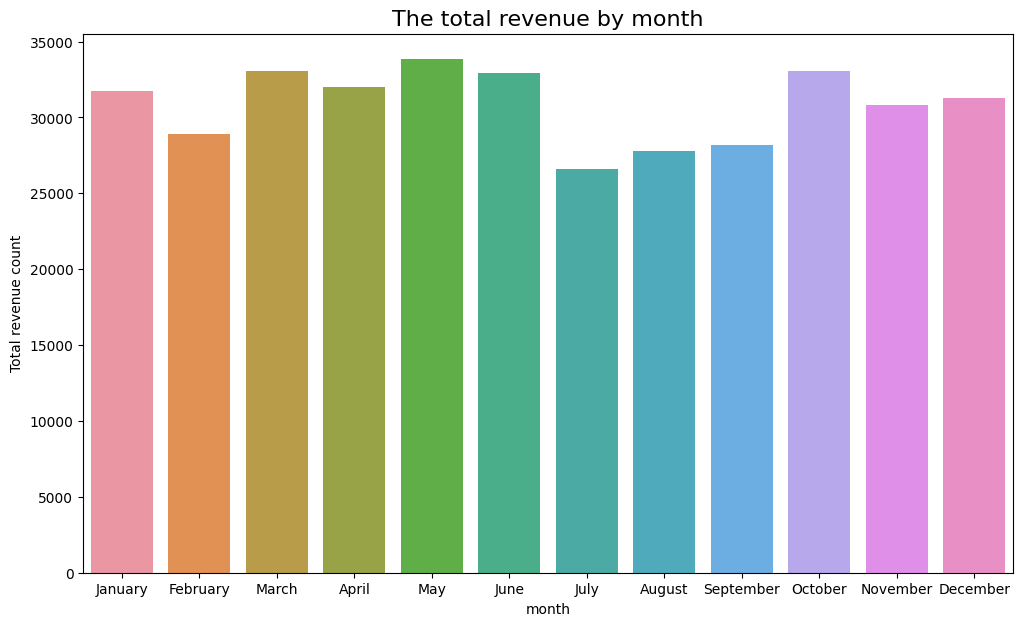

In [ ]:
# Create a bar plot of monthly revenue

plt.figure(figsize = (12,7))
plt.title("The total revenue by month", fontsize = 16)
px3 = sns.barplot( x = monthly_revenue.index, y = monthly_revenue)
px3.set_xticklabels(month_order)
plt.ylabel('Total revenue count')

*- Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.*


---



**Plot mean trip distance by drop off location.**

In [ ]:
# Number of drop off location (unique locations)

df['DOLocationID'].nunique()

216

In [ ]:
# Calculate the mean trip distance by each unique drop off location

do_mean_distance = df.groupby(['DOLocationID'])['trip_distance'].mean().reset_index()
do_mean_distance

,DOLocationID,trip_distance
0,1,17.027353
1,4,2.436634
2,7,3.964944
3,9,9.305000
4,10,3.750000
...,...,...
211,261,4.935897
212,262,2.866897
213,263,2.501951
214,264,2.928783


In [ ]:
# Sort the results in ascending order by mean trip distance

do_mean_distance = do_mean_distance.sort_values('trip_distance')
do_mean_distance

,DOLocationID,trip_distance
164,207,1.200000
154,193,1.390556
192,237,1.555494
189,234,1.727806
109,137,1.818852
...,...,...
40,51,17.310000
5,11,17.945000
167,210,20.500000
21,29,21.650000


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

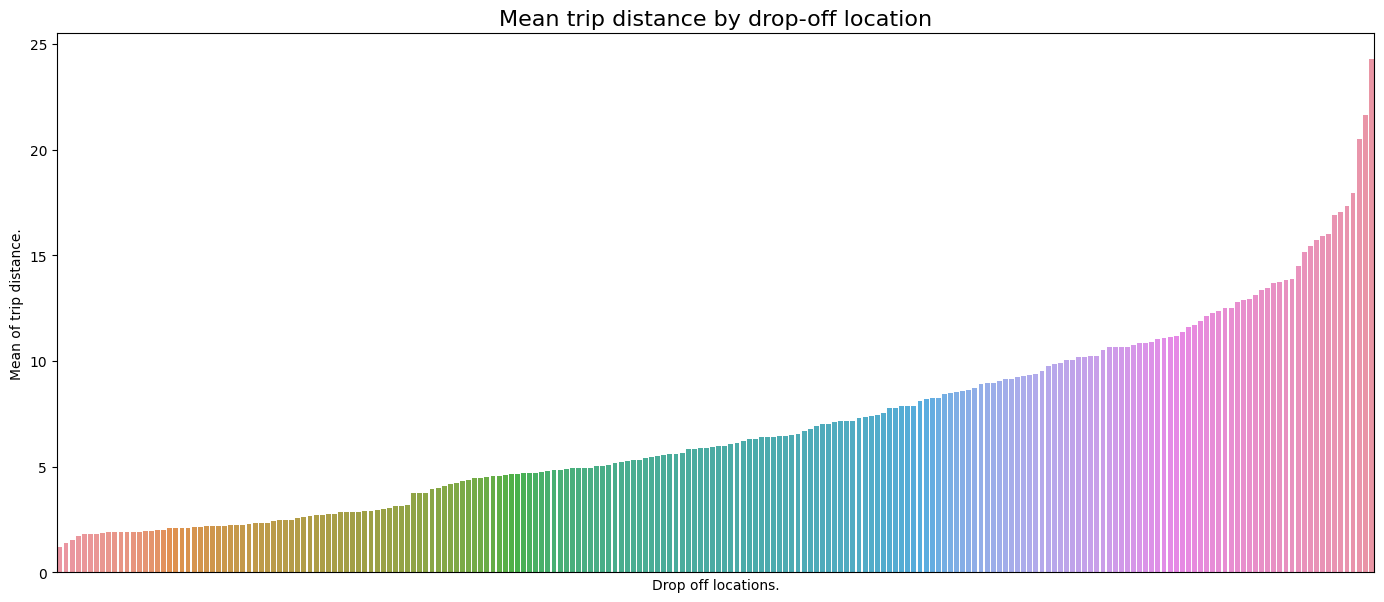

In [ ]:
# Visualize the mean of trip distance by drop off location in ascending order

plt.figure(figsize = (17, 7))
px4 = sns.barplot(x = do_mean_distance.index,
                  y = do_mean_distance['trip_distance'],
                  order = do_mean_distance.index)
px4.set_xticklabels([])
px4.set_xticks([])
plt.xlabel('Drop off locations.')
plt.ylabel('Mean of trip distance.')
plt.title('Mean trip distance by drop-off location', fontsize = 16)

*This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.*

*To confirm this conclusion, we consider the experiment as following:*

1. Create a sample of coordinates from a normal distribution—in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5.
2. Calculate the distance between each pair of coordinates.
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with.
4. Plot the mean distance for each unique endpoint.

In [ ]:
# 1. Generate random points on a 2D plane from a normal distribution

test = np.round(np.random.normal(10, 5, (3000,2)), 1)

# Calculate midpoint of the array of coordinates
midway = int(len(test)/2)

# Isolate first and second half of array ("pick-up/drop off locations")
start = test[:midway]
end = test[midway:]

In [ ]:
# 2. Calculate Euclidean distances between 2 points in first and second half of array

distances = (end - start)**2
distances = distances.sum(axis = -1) # return a 1D array where each element is the sum of the elements in the corresponding row of distances
distances = np.sqrt(distances)
distances

array([ 6.36003145,  2.70185122,  9.56033472, ...,  3.12409987,
        8.15414005, 19.1031411 ])

In [ ]:
# 3. Group the coordinates by "drop off location", compute mean distance

test_df = pd.DataFrame({'start':[tuple(x) for x in start.tolist()],
                        'end':[tuple(x) for x in end.tolist()],
                        'distance': distances})

data = test_df[['end', 'distance']].groupby(['end']).mean()
data = data.sort_values(['distance'])
data

,distance
end,
"(14.4, 11.8)",0.316228
"(11.3, 16.1)",0.412311
"(4.3, 11.8)",0.412311
"(10.3, 5.6)",0.447214
"(9.9, 7.5)",0.583095
...,...
"(11.7, 17.0)",23.126176
"(25.4, 9.0)",23.178007
"(1.5, -5.4)",23.257257


Text(0, 0.5, 'Mean distances')

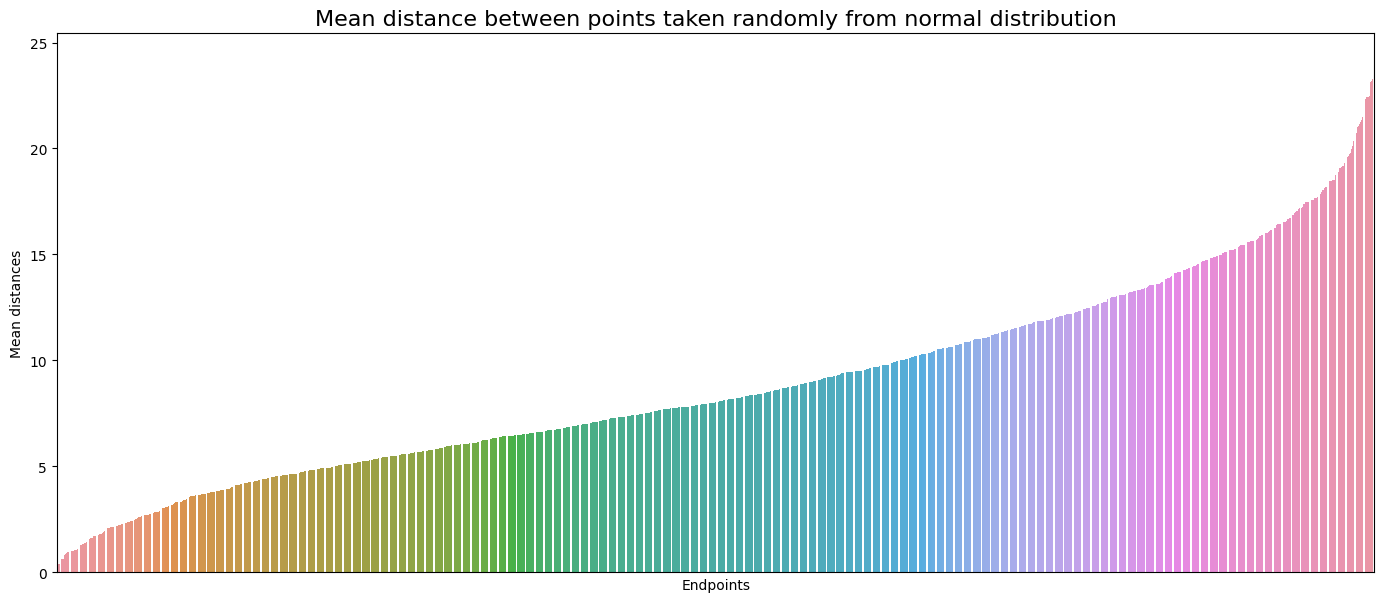

In [ ]:
# 4. Plot the mean distance between each endpoint and all points it connected to

plt.figure(figsize = (17, 7))
px5 = sns.barplot(x = data.index,
                  y = data['distance'],
                  order = data.index)

plt.title('Mean distance between points taken randomly from normal distribution', fontsize = 16)
px5.set_xticklabels([])
px5.set_xticks([])
plt.xlabel('Endpoints')
plt.ylabel('Mean distances')

*The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. However, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.*


---



**Histogram of rides by drop off locations.**

In [ ]:
# Check if all drop off locations are consecutively numbered

df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

*There are 49 numbers that do not represent a drop-off location.*

- To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

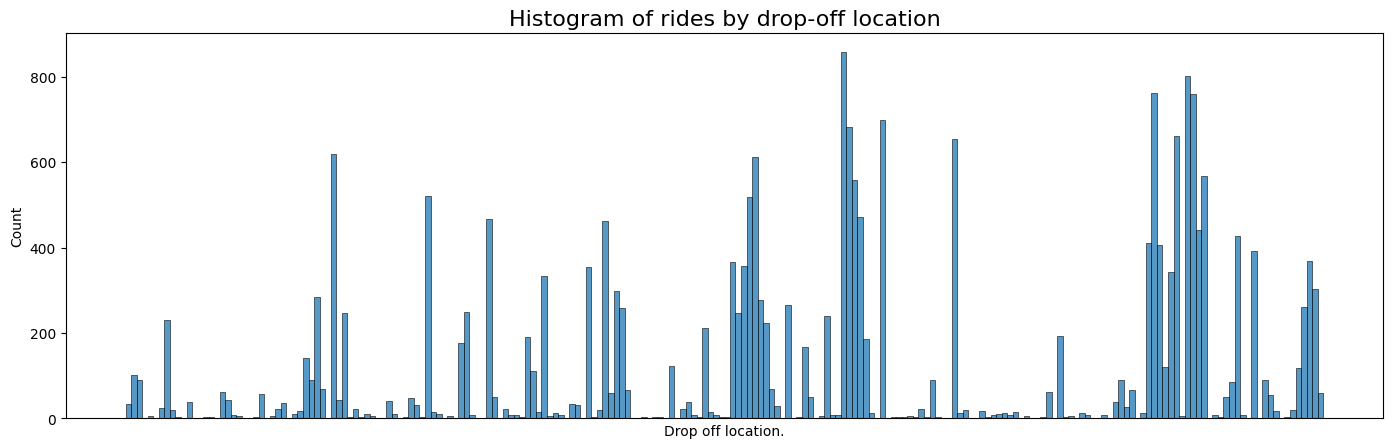

In [ ]:
# Sort the drop off location ID
sort_df = df['DOLocationID'].sort_values()

# Convert to string
sort_df = sort_df.astype('str')

# Visualize the histogram
plt.figure(figsize = (17, 5))
px6 = sns.histplot(sort_df, bins = range(0, df['DOLocationID'].max() + 1, 1))
px6.set_xticks([])
px6.set_xticklabels([])
plt.xlabel('Drop off location.')
plt.title('Histogram of rides by drop-off location', fontsize=16)

*Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.*


---



In [ ]:
# Calculate the trip duration

df['trip_duration'] = df['dropoff_date'] - df['pickup_date']

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_date,dropoff_date,month,day,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,2017-03-25 08:55:43,2017-03-25 09:09:47,March,Saturday,0 days 00:14:04
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,2017-04-11 14:53:28,2017-04-11 15:19:58,April,Tuesday,0 days 00:26:30
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:26:56,2017-12-15 07:34:08,December,Friday,0 days 00:07:12
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:17:59,2017-05-07 13:48:14,May,Sunday,0 days 00:30:15
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:32:20,2017-04-15 23:49:03,April,Saturday,0 days 00:16:43
